# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import requote_uri

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
#Save config Information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# counter for City Index
count=1 
# Counter for number of sets to be created
sets =1 

#Intializing the lists to hold values
max_temp = []
city_name = []
city_lat = []
city_lng = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
country = []
city_date = []

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    #Set counter for number of sets to return
    if count % 50 == 0:
            sets+=1
            
    # Build Final query URL 
    final_url = requote_uri(f"{base_url}appid={weather_api_key}&units={units}&q={city}")
    #print(final_url)
        
    #Make API calls to each city
    response = requests.get(final_url).json()
    
    #Since some data may be missing , use try-except to skip any that are missing a data point.
    try:
        print(f'Processing Record {count} of Set {sets} | {city}')
        
        #Fetching 'weather data' from the 'json resonse' from the API call
        max_temp.append(response['main']['temp_max'])
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_humidity.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        #print(city_date)
        #Incrementing city index
        count+=1        
        
    except KeyError:
        print("City not found. Skipping...")
        count+=1 #increment city index after missing cities
        

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kokkola
Processing Record 4 of Set 1 | shenjiamen
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | portland
Processing Record 7 of Set 1 | santa fe
Processing Record 8 of Set 1 | nyagan
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | boffa
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | emerald
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | zafra
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | norman wells
Processing Record 23 of Set 1 | bambous virieux
Processing Rec

Processing Record 186 of Set 4 | provideniya
Processing Record 187 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 188 of Set 4 | east london
Processing Record 189 of Set 4 | saint-augustin
Processing Record 190 of Set 4 | singkang
Processing Record 191 of Set 4 | panalingaan
Processing Record 192 of Set 4 | touros
Processing Record 193 of Set 4 | chagda
City not found. Skipping...
Processing Record 194 of Set 4 | show low
Processing Record 195 of Set 4 | usagara
Processing Record 196 of Set 4 | kpandae
Processing Record 197 of Set 4 | yefira
City not found. Skipping...
Processing Record 198 of Set 4 | najran
Processing Record 199 of Set 4 | bathsheba
Processing Record 200 of Set 5 | mega
Processing Record 201 of Set 5 | dolores
Processing Record 202 of Set 5 | gazojak
Processing Record 203 of Set 5 | avera
Processing Record 204 of Set 5 | alexandria
Processing Record 205 of Set 5 | derzhavinsk
Processing Record 206 of Set 5 | navirai
Processing Record 207 of Set 5

Processing Record 370 of Set 8 | fereydun kenar
Processing Record 371 of Set 8 | methven
Processing Record 372 of Set 8 | altay
Processing Record 373 of Set 8 | roald
Processing Record 374 of Set 8 | knysna
Processing Record 375 of Set 8 | noumea
Processing Record 376 of Set 8 | elizabeth city
Processing Record 377 of Set 8 | lakselv
Processing Record 378 of Set 8 | pemangkat
Processing Record 379 of Set 8 | nalut
Processing Record 380 of Set 8 | homer
Processing Record 381 of Set 8 | sinnamary
Processing Record 382 of Set 8 | vanino
Processing Record 383 of Set 8 | matara
Processing Record 384 of Set 8 | imeni poliny osipenko
Processing Record 385 of Set 8 | te anau
Processing Record 386 of Set 8 | aginskoye
Processing Record 387 of Set 8 | sao joao da barra
Processing Record 388 of Set 8 | oranjemund
Processing Record 389 of Set 8 | yerbogachen
Processing Record 390 of Set 8 | zhenhai
Processing Record 391 of Set 8 | mudu
Processing Record 392 of Set 8 | padang
Processing Record 393 

Processing Record 556 of Set 12 | sopelana
Processing Record 557 of Set 12 | vestmannaeyjar
Processing Record 558 of Set 12 | morro bay
Processing Record 559 of Set 12 | barcelos
Processing Record 560 of Set 12 | khor
Processing Record 561 of Set 12 | schwanewede
Processing Record 562 of Set 12 | urengoy
Processing Record 563 of Set 12 | red wing
Processing Record 564 of Set 12 | faya
Processing Record 565 of Set 12 | malakal
Processing Record 566 of Set 12 | valley
Processing Record 567 of Set 12 | susanville
Processing Record 568 of Set 12 | muros
Processing Record 569 of Set 12 | begunitsy
Processing Record 570 of Set 12 | muzaffarabad
Processing Record 571 of Set 12 | villazon
Processing Record 572 of Set 12 | road town
Processing Record 573 of Set 12 | shakhtinsk
Processing Record 574 of Set 12 | iquitos
Processing Record 575 of Set 12 | goderich
Processing Record 576 of Set 12 | rorvik
Processing Record 577 of Set 12 | bonthe
Processing Record 578 of Set 12 | kutum
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
city_data = pd.DataFrame({
                            "City":city_name,
                            "Lat":city_lat,
                            "Lng":city_lng,
                            "Max Temp(F)":max_temp,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_windspeed,
                            "Country":country,
                            "Date":city_date
                            })

#Save data in .csv file format
city_data.to_csv("Output_data/Airport_Output.csv" , index=False , encoding="utf-8")

#Displaying the Data
city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.50,79,6,18.14,PF,1612559434
1,Ushuaia,-54.8000,-68.3000,48.20,71,40,28.77,AR,1612559651
2,Kokkola,63.8385,23.1307,18.00,85,0,5.75,FI,1612559651
3,Shenjiamen,29.9576,122.2980,48.33,92,86,12.53,CN,1612559652
4,Lebu,-37.6167,-73.6500,64.81,72,10,12.17,CL,1612559652
...,...,...,...,...,...,...,...,...,...
564,Morgan City,29.6994,-91.2068,46.00,87,90,16.11,US,1612559765
565,Lagoa,39.0500,-27.9833,58.06,85,98,14.88,PT,1612559506
566,Itarema,-2.9248,-39.9167,79.41,77,18,13.04,BR,1612559664
567,Methóni,36.8197,21.7049,55.99,87,0,4.61,GR,1612559765


In [72]:
#Statistical Analysis of city data
round(city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,569.00,569.00,569.00,569.00,569.00,569.00,5.690000e+02
mean,21.58,12.66,49.40,72.60,52.54,8.44,1.612560e+09
std,32.52,91.12,32.62,19.79,40.08,5.75,9.268000e+01
min,-54.80,-179.17,-42.30,11.00,0.00,0.45,1.612559e+09
25%,-3.75,-66.90,30.99,62.00,6.00,3.98,1.612560e+09
50%,26.12,22.47,60.80,78.00,61.00,6.91,1.612560e+09
75%,48.65,92.75,75.20,88.00,94.00,11.50,1.612560e+09
max,78.22,179.32,95.85,100.00,100.00,29.42,1.612560e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
#Finding rows with humity value greater than 100
Humidity_over100_df = city_data[city_data['Humidity']>100]
Humidity_over100_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date


##### Note: There are no cities with Humidy greater than 100%

In [74]:
#  Get the indices of cities that have humidity over 100%.
# Only if there are cities with humidy > 100%
index = Humidity_over100_df.index
index

Int64Index([], dtype='int64')

In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.50,79,6,18.14,PF,1612559434
1,Ushuaia,-54.8000,-68.3000,48.20,71,40,28.77,AR,1612559651
2,Kokkola,63.8385,23.1307,18.00,85,0,5.75,FI,1612559651
3,Shenjiamen,29.9576,122.2980,48.33,92,86,12.53,CN,1612559652
4,Lebu,-37.6167,-73.6500,64.81,72,10,12.17,CL,1612559652
...,...,...,...,...,...,...,...,...,...
564,Morgan City,29.6994,-91.2068,46.00,87,90,16.11,US,1612559765
565,Lagoa,39.0500,-27.9833,58.06,85,98,14.88,PT,1612559506
566,Itarema,-2.9248,-39.9167,79.41,77,18,13.04,BR,1612559664
567,Methóni,36.8197,21.7049,55.99,87,0,4.61,GR,1612559765


In [76]:
#Statistical Analysis of dropped data set (in case there are outliers)
round(clean_city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,569.00,569.00,569.00,569.00,569.00,569.00,5.690000e+02
mean,21.58,12.66,49.40,72.60,52.54,8.44,1.612560e+09
std,32.52,91.12,32.62,19.79,40.08,5.75,9.268000e+01
min,-54.80,-179.17,-42.30,11.00,0.00,0.45,1.612559e+09
25%,-3.75,-66.90,30.99,62.00,6.00,3.98,1.612560e+09
50%,26.12,22.47,60.80,78.00,61.00,6.91,1.612560e+09
75%,48.65,92.75,75.20,88.00,94.00,11.50,1.612560e+09
max,78.22,179.32,95.85,100.00,100.00,29.42,1.612560e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

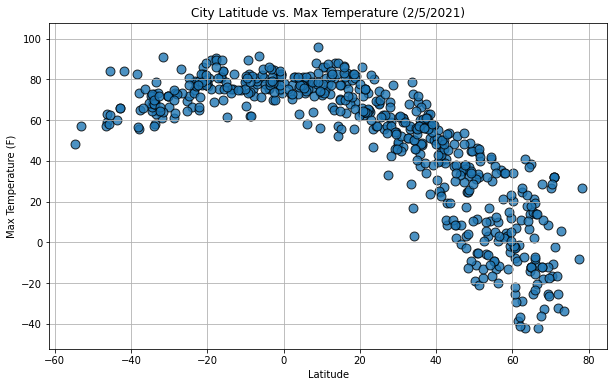

<Figure size 432x288 with 0 Axes>

In [187]:
# Function to Plot Scatter 
def Scatterplot(x,y,title,ylabel,i,j):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=.8, s=80, edgecolor="black")
    plt.grid()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(min(y)-i,max(y)+j)
    plt.show()
    plt.tight_layout()

#Set current date for title
date = '2/5/2021'    

#Set X-Axis and Y-axis for plotting    
x_axis = clean_city_data["Lat"]
y_axis_temp = clean_city_data["Max Temp(F)"]

#Set Title
title = f"City Latitude vs. Max Temperature ({date})"
y_label_T = "Max Temperature (F)"

#Set ylim minimum
ymin = 10
ymax = 12

#Call the function for plotting
scatterplot_Lat_Temp =  Scatterplot(x_axis,y_axis_temp ,title,y_label_T,ymin,ymax)   


## Latitude vs. Humidity Plot

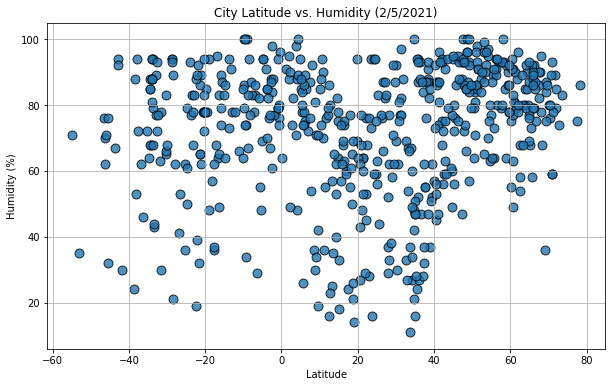

<Figure size 432x288 with 0 Axes>

In [190]:
#Since X-Axis is already set, get Y-axis values for plotting  
y_axis_Humidity = clean_city_data["Humidity"]

#Set Title and Label
title_H = f"City Latitude vs. Humidity ({date})"
y_label_H = "Humidity (%)"
#Set ylim minimum
ymin_H = 5
ymax_H = 5
#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_Humidity , title_H, y_label_H, ymin_H, ymax_H)  

## Latitude vs. Cloudiness Plot

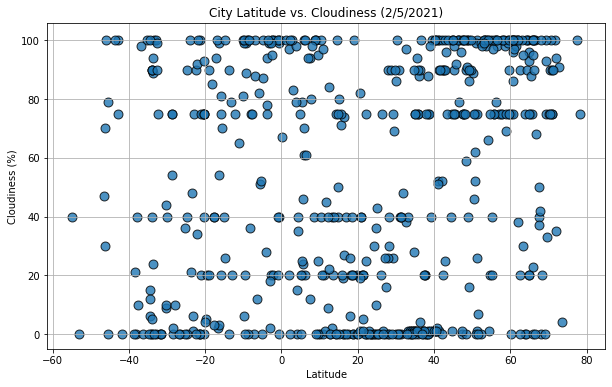

<Figure size 432x288 with 0 Axes>

In [192]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_cloud = clean_city_data["Cloudiness"]

#Set Title and Label
title_C = f"City Latitude vs. Cloudiness ({date})"
y_label_C= "Cloudiness (%)"
#Set ylim minimum
ymin_C = 5
ymax_C = 6
#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_cloud , title_C, y_label_C, ymin_C, ymax_C)  

## Latitude vs. Wind Speed Plot

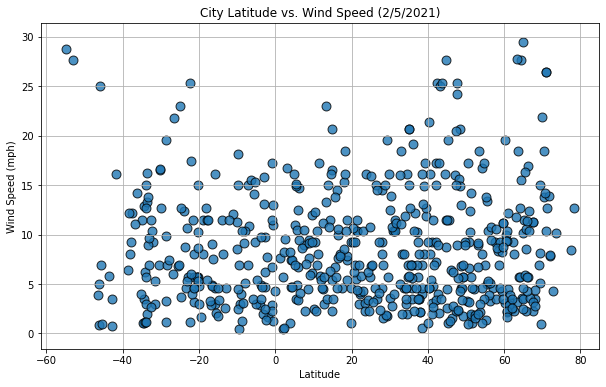

<Figure size 432x288 with 0 Axes>

In [198]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_wind = clean_city_data["Wind Speed"]

#Set Title and Label
title_W = f"City Latitude vs. Wind Speed ({date})"
y_label_W= "Wind Speed (mph)"
#Set ylim minimum
ymin_W = 2
ymax_W = 2

#Call the function for plotting
scatterplot_Lat_Wind =  Scatterplot(x_axis, y_axis_wind , title_W, y_label_W, ymin_W, ymax_W)  

## Linear Regression

In [206]:
#Find data for Northern Hemisphere
Northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>=0 , :]
#Northern Hemisphere Temperature data points
Northern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
2,Kokkola,63.8385,23.1307,18.00,85,0,5.75,FI,1612559651
3,Shenjiamen,29.9576,122.2980,48.33,92,86,12.53,CN,1612559652
5,Portland,45.5234,-122.6762,52.00,76,75,11.50,US,1612559320
7,Nyagan,62.1406,65.3936,10.99,96,100,2.46,RU,1612559652
8,Qaanaaq,77.4840,-69.3632,-8.28,75,100,8.39,GL,1612559653
...,...,...,...,...,...,...,...,...,...
561,Lewisporte,49.2499,-55.0482,33.80,100,90,6.91,CA,1612559764
562,Alamosa,37.4695,-105.8700,33.80,37,20,3.44,US,1612559760
564,Morgan City,29.6994,-91.2068,46.00,87,90,16.11,US,1612559765
565,Lagoa,39.0500,-27.9833,58.06,85,98,14.88,PT,1612559506


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Function to calculate Linar regression values:

In [207]:
#Calculate and Run Linear Regression 
def linarequation(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue , line_eq , regress_values

In [208]:
# Find X_Axis and Y_Axis values
x_axis_northern = Northern_hemisphere_df['Lat']
y_axis_northern = Northern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_NT , line_eq_NT, regress_values_NT= linarequation(x_axis_northern,y_axis_northern)

#Print values to display
print(f'Linear R Equation : {line_eq_NT}')
print(f"The r-value is: {round(rvalue_NT**2,2)}")

Linear R Equation : y = -1.44x + 94.77
The r-value is: 0.74


##### Note: Function to plot scatter with LR equation

In [228]:
#Scatter plot with LR equation
def LR_Scatterplot(x, y, reg_value,line_eq, title, ylabel, ymin, ymax, lmin, lmax):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y , alpha=.8, s=80, edgecolor="black")
    plt.plot(x,reg_value,"r-")
    plt.annotate(line_eq,(lmin,max(y)+lmax),fontsize=20,color="red")
    plt.grid()
    plt.title(title, fontsize = 15)
    plt.ylim(min(y) -ymin, max(y) +ymax)
    plt.xlabel("Latitude" , fontsize = 13)
    plt.ylabel(ylabel , fontsize = 13)
    plt.show()
    plt.tight_layout()

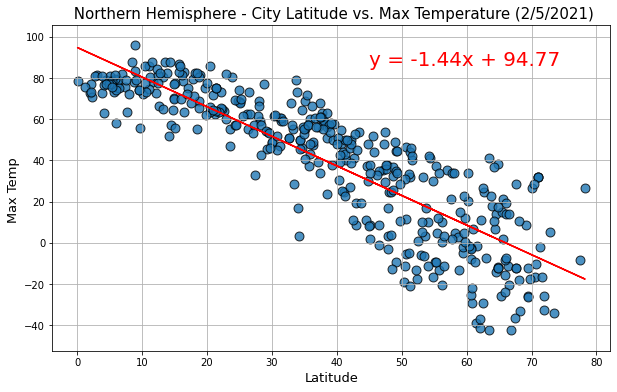

<Figure size 432x288 with 0 Axes>

In [232]:
#plotting scatter Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Set Title and Label for the pLot    
title_NT = f" Northern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_NT = "Max Temp "

#Set ylim minimum
ymin_NT = 10
ymax_NT = 10

#set annotation limit
lmin_NT =45
lmax_NT =-10

#Call the function for plotting
scatterplot_NH_Temp =  LR_Scatterplot(x_axis_northern, 
                                      y_axis_northern , 
                                      regress_values_NT, 
                                      line_eq_NT,
                                      title_NT, 
                                      ylabel_NT, 
                                      ymin_NT, ymax_NT,
                                      lmin_NT,lmax_NT)  


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [222]:
#Find data for Southern Hemisphere
Southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<0 , :]
#Southern Hemisphere Temperature data points
Southern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.50,79,6,18.14,PF,1612559434
1,Ushuaia,-54.8000,-68.3000,48.20,71,40,28.77,AR,1612559651
4,Lebu,-37.6167,-73.6500,64.81,72,10,12.17,CL,1612559652
6,Santa Fe,-31.6333,-60.7000,91.00,30,0,3.00,AR,1612559652
10,Kaitangata,-46.2817,169.8464,59.00,70,70,5.01,NZ,1612559653
...,...,...,...,...,...,...,...,...,...
554,Puerto Baquerizo Moreno,-0.9000,-89.6000,84.20,79,20,17.27,EC,1612559763
559,Morondava,-20.2833,44.2833,82.18,83,93,8.63,MG,1612559763
563,Calama,-22.4667,-68.9333,77.00,19,0,25.32,CL,1612559764
566,Itarema,-2.9248,-39.9167,79.41,77,18,13.04,BR,1612559664


In [223]:
# Find X_Axis and Y_Axis values
x_axis_South = Southern_hemisphere_Temp['Lat']
y_axis_South = Southern_hemisphere_Temp['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_ST , line_eq_ST ,regress_values_ST = linarequation(x_axis_South,y_axis_South)

#Print values to display
print(f'Linear R Equation : {line_eq_ST}')
print(f"The r-value is: {round(rvalue_ST**2,2)}")

Linear R Equation : y = 0.35x + 81.77
The r-value is: 0.31


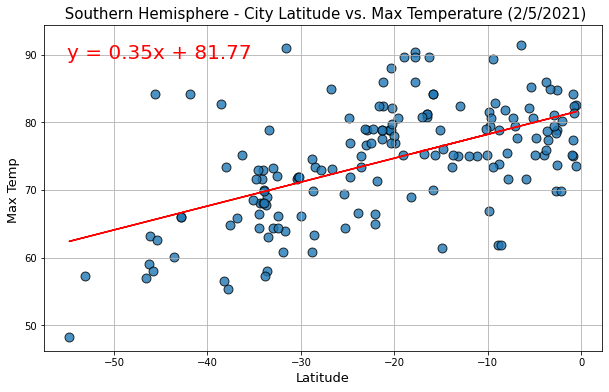

<Figure size 432x288 with 0 Axes>

In [238]:
#plotting scatter Southern Hemisphere - Max Temp vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_ST = f" Southern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_ST = "Max Temp "

#Set ylim minimum
ymin_ST = 2
ymax_ST = 3

#set annotation limit
lmin_ST =-55
lmax_ST =-2

#Call the function for plotting
scatterplot_SH_Temp =  LR_Scatterplot(x_axis_South, 
                                      y_axis_South , 
                                      regress_values_ST, 
                                      line_eq_ST,
                                      title_ST, 
                                      ylabel_ST, 
                                      ymin_ST, ymax_ST,
                                      lmin_ST , lmax_ST )  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [130]:
#Find data for Northern Hemisphere
Northern_hemisphere_Humid = clean_city_data.loc[clean_city_data["Lat"]>=0 , ["Lat","Humidity"]]
#Southern Hemisphere Temperature data points
Northern_hemisphere_Humid

,Lat,Humidity
2,63.8385,85
3,29.9576,92
5,45.5234,76
7,62.1406,96
8,77.4840,75
...,...,...
561,49.2499,100
562,37.4695,37
564,29.6994,87
565,39.0500,85


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [129]:
clean_city_data.columns

Index(['City', 'Lat', 'Lng', 'Max Temp(F)', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression